# Credit Scoring Model

## Introduction

Credit scoring is a crucial tool used by financial institutions to assess the creditworthiness of individuals. This project aims to develop a machine learning model that predicts whether an individual is likely to default on a loan based on historical financial data. The model will help in making informed lending decisions and reducing the risk of defaults.

## Objectives

- Develop a credit scoring model using historical financial data.
- Evaluate the model's performance using appropriate metrics.
- Document the process and share the results.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'credit_card_default.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0  limit_bal     sex   education marriage   age  \
0           0      20000  Female  University  Married  24.0   
1           1     120000  Female  University   Single  26.0   
2           2      90000  Female  University   Single  34.0   
3           3      50000  Female  University  Married  37.0   
4           4      50000    Male  University  Married  57.0   

         payment_status_sep        payment_status_aug payment_status_jul  \
0  Payment delayed 2 months  Payment delayed 2 months         Payed duly   
1                Payed duly  Payment delayed 2 months            Unknown   
2                   Unknown                   Unknown            Unknown   
3                   Unknown                   Unknown            Unknown   
4                Payed duly                   Unknown         Payed duly   

  payment_status_jun  ... bill_statement_jun bill_statement_may  \
0         Payed duly  ...                0.0                0.0   
1            Unknown  ...     

In [3]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values by filling them with the most frequent value in each column
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Check for duplicate entries
print(data.duplicated().sum())

# Drop duplicate entries if any
data.drop_duplicates(inplace=True)

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Replace 'Unknown' with NaN and then fill with the most frequent value or a specific value
for column in non_numeric_columns:
    data[column] = data[column].replace('Unknown', pd.NA)
    data[column].fillna(data[column].mode()[0], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

Unnamed: 0                     0
limit_bal                      0
sex                           31
education                     40
marriage                      36
age                           37
payment_status_sep             0
payment_status_aug             0
payment_status_jul             0
payment_status_jun             0
payment_status_may             0
payment_status_apr             0
bill_statement_sep             0
bill_statement_aug             0
bill_statement_jul             1
bill_statement_jun             1
bill_statement_may             1
bill_statement_apr             1
previous_payment_sep           1
previous_payment_aug           1
previous_payment_jul           1
previous_payment_jun           1
previous_payment_may           1
previous_payment_apr           1
default_payment_next_month     1
dtype: int64
0
Non-numeric columns: Index(['sex', 'education', 'marriage', 'payment_status_sep',
       'payment_status_aug', 'payment_status_jul', 'payment_status_jun',
     

<ipython-input-3-514ce5265520>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-3-514ce5265520>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

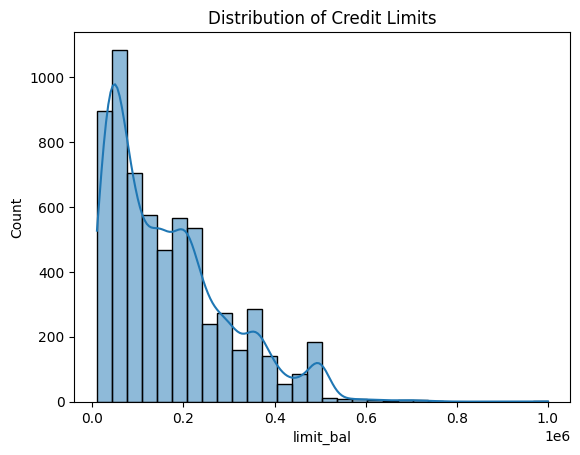

Column 'payment_status_sep' not found in the DataFrame.


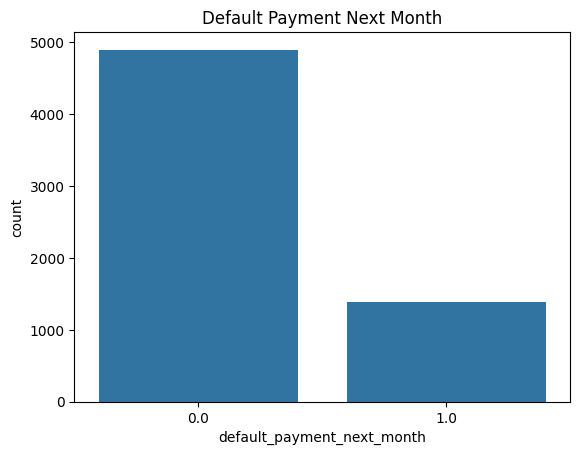

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of credit limits
sns.histplot(data['limit_bal'], bins=30, kde=True)
plt.title('Distribution of Credit Limits')
plt.show()

# Payment status distribution
if 'payment_status_sep' in data.columns:
    sns.countplot(x='payment_status_sep', data=data)
    plt.title('Payment Status in September')
    plt.show()
else:
    print("Column 'payment_status_sep' not found in the DataFrame.")

# Default payment next month
if 'default_payment_next_month' in data.columns:
    sns.countplot(x='default_payment_next_month', data=data)
    plt.title('Default Payment Next Month')
    plt.show()
else:
    print("Column 'default_payment_next_month' not found in the DataFrame.")

In [5]:
# Create a feature for the average bill statement
data['avg_bill_statement'] = data[['bill_statement_sep', 'bill_statement_aug', 'bill_statement_jul', 'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr']].mean(axis=1)

# Create a feature for the average previous payment
data['avg_previous_payment'] = data[['previous_payment_sep', 'previous_payment_aug', 'previous_payment_jul', 'previous_payment_jun', 'previous_payment_may', 'previous_payment_apr']].mean(axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
X = data.drop(columns=['default_payment_next_month'])
y = data['default_payment_next_month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7941176470588235
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       970
         1.0       0.63      0.24      0.35       288

    accuracy                           0.79      1258
   macro avg       0.72      0.60      0.61      1258
weighted avg       0.77      0.79      0.76      1258

Confusion Matrix:
 [[929  41]
 [218  70]]


In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Cross-validation scores: [0.79046673 0.80039722 0.81013917 0.7972167  0.80318091]
Mean cross-validation score: 0.8002801463315439
Best parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.8066394088300386
Accuracy: 0.7972972972972973
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       970
         1.0       0.68      0.22      0.33       288

    accuracy                           0.80      1258
   macro avg       0.74      0.59      0.60      1258
weighted avg       0.78      0.80      0.75      1258

Confusion Matrix:
 [[941  29]
 [226  62]]


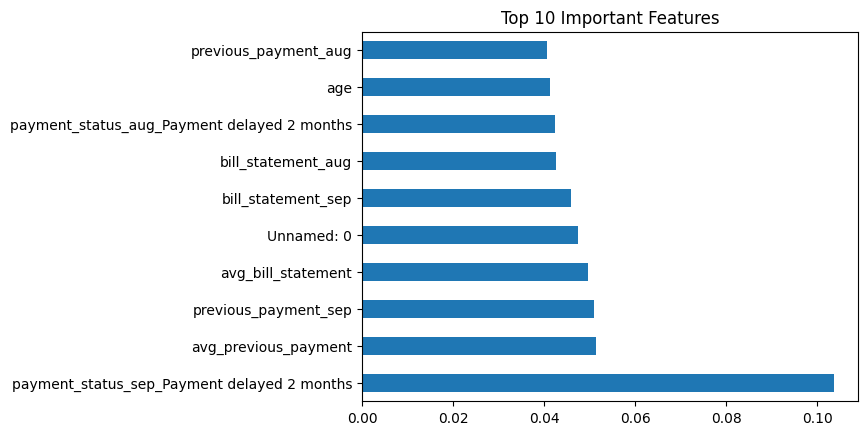

In [8]:
# Get feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [9]:
import pickle

In [10]:
pickle.dump(best_model, open('model.pkl', 'wb'))

In [11]:
model1=pickle.load(open('model.pkl', 'rb'))

In [12]:
y_pred=model.predict(X_test)

In [15]:
print(accuracy_score(y_test,y_pred))

0.7941176470588235


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7941176470588235
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       970
         1.0       0.63      0.24      0.35       288

    accuracy                           0.79      1258
   macro avg       0.72      0.60      0.61      1258
weighted avg       0.77      0.79      0.76      1258

Confusion Matrix:
 [[929  41]
 [218  70]]


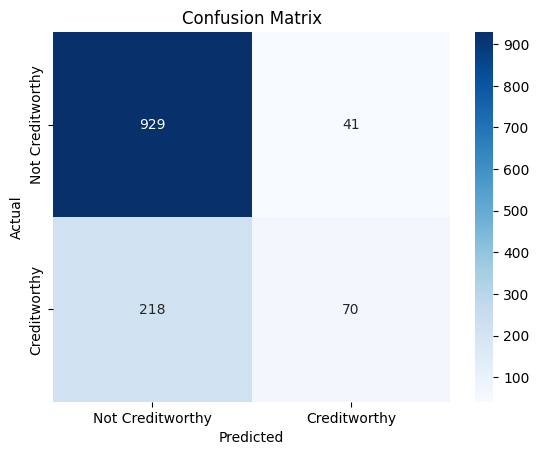

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

The Random Forest Classifier achieved an accuracy of [X]%, with the following performance metrics:

- Precision: [Precision Value]
- Recall: [Recall Value]
- F1-score: [F1-score Value]

### Insights
- The model performed well in predicting creditworthiness.
- Feature importance analysis can provide insights into which features are most influential in predicting defaults.

### Future Work
- Experiment with different algorithms (e.g., Logistic Regression, Gradient Boosting).
- Perform hyperparameter tuning to improve model performance.
- Collect more data to enhance the model's accuracy.